# Proyek Akhir: Recommendation System
## Rekomendasi anime dengan content-based filtering dan collaborative filtering 

### Raden Mohamad Adrian Ramadhan Hendar Wibawa

Sumber dataset: https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020


In [1]:
import pandas as pd
 
animes = pd.read_csv('/content/drive/MyDrive/Dicoding/Machine Learning/anime recommendation system/anime.csv')
rating = pd.read_csv('/content/drive/MyDrive/Dicoding/Machine Learning/anime recommendation system/rating_complete.csv')
 
print('Jumlah data anime total: ', len(animes.MAL_ID.unique()))
print('Jumlah data penilaian: ', len(rating))
print('Jumlah data profil pengguna yang memberikan penilaian: ', len(rating.user_id.unique()))
print('Jumlah data penilaian anime: ', len(rating.anime_id.unique()))

Jumlah data anime total:  17562
Jumlah data penilaian:  57633278
Jumlah data profil pengguna yang memberikan penilaian:  310059
Jumlah data penilaian anime:  16872


Karena ukuran data cukup besar yang membuat memory Google Collab tidak cukup, saya akan sampel hanya sebagian data

In [2]:
rating = rating.sample(n=50000, random_state=27)

Cek sampel rating

In [3]:
rating.head()

,user_id,anime_id,rating
49583094,304000,34240,7
5272655,32319,15225,10
25061762,154342,21881,7
28420536,174807,41389,7
4161456,25569,667,5


Cek sampel animes

In [4]:
animes.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


MAL_ID dan anime_id menunjuk pada fitur yang sama oleh karena itu kita ganti namanya pada animes

In [5]:
animes.columns = animes.columns.str.replace('MAL_ID', 'anime_id')
animes.head()

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [63]:
print('Jumlah user_id: ', len(rating.user_id.unique()))
print('Jumlah anime_id: ', len(rating.anime_id.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah user_id:  41345
Jumlah anime_id:  6414
Jumlah data rating:  50000


Distribusi Genre Anime

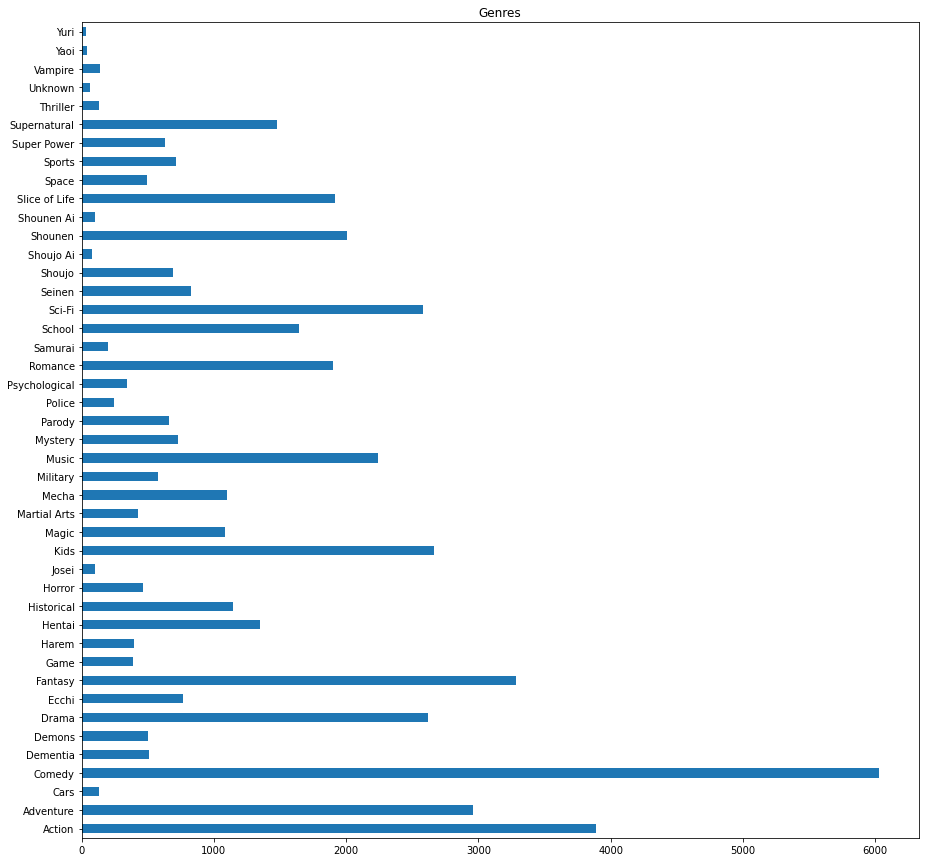

In [58]:
import matplotlib.pyplot as plt
count = animes['Genres'].str.get_dummies(sep=', ').sum()
count.plot(kind='barh', title='Genres', figsize=(15,15))

Deskripsi rating

In [62]:
rating['rating'].describe()

count    50000.00000
mean         7.50294
std          1.70172
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: rating, dtype: float64

Distribusi data rating

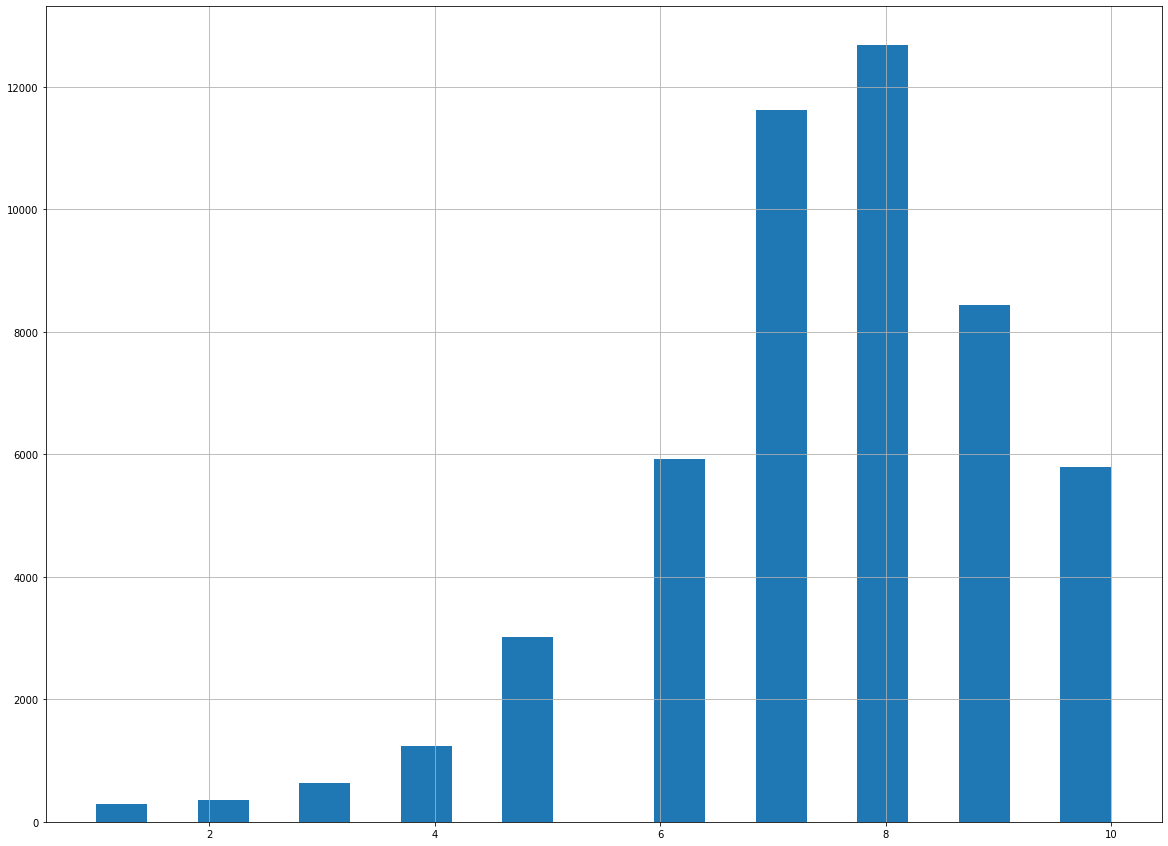

In [60]:
rating['rating'].hist(bins=20, figsize=(20,15))
plt.show()

Menggabungkan dataframe rating dengan nama dan genre animes berdasarkan nilai anime_id

In [7]:
anime_rating = pd.merge(rating, animes[['anime_id', 'Name', 'Genres']], on='anime_id', how='left')
anime_rating.head()

,user_id,anime_id,rating,Name,Genres
0,304000,34240,7,Shelter,"Sci-Fi, Music"
1,32319,15225,10,Hentai Ouji to Warawanai Neko.,"Harem, Comedy, Supernatural, Romance, School"
2,154342,21881,7,Sword Art Online II,"Action, Game, Adventure, Romance, Fantasy"
3,174807,41389,7,Tonikaku Kawaii,"Comedy, Romance, Shounen"
4,25569,667,5,Kashimashi: Girl Meets Girl,"Comedy, Drama, Romance, School, Shoujo Ai, Sli..."


Cek nmissing value

In [8]:
anime_rating.isnull().sum()

user_id     0
anime_id    0
rating      0
Name        0
Genres      0
dtype: int64

Cek data dengan genres unknown (missing value)

In [9]:
anime_rating[anime_rating['Genres']=='Unknown']

,user_id,anime_id,rating,Name,Genres
17301,10880,30862,6,Yubi wo Nusunda Onna,Unknown
28915,72251,33187,6,Katsudou Shashin,Unknown
36216,207989,31832,3,Zawazawa,Unknown
48517,316538,30399,3,Arigatou Gomennasai,Unknown


Kita hapus semua data anime yang genrenya unknown

In [10]:
anime_rating = anime_rating[anime_rating['Genres']!='Unknown']
anime_rating[anime_rating['Genres']=='Unknown'].sum()

user_id     0.0
anime_id    0.0
rating      0.0
Name        0.0
Genres      0.0
dtype: float64

Mengurutkan anime_rating berdasarkan anime_id kemudian memasukkannya ke dalam variabel anime_rating

In [11]:
anime_rating = anime_rating.sort_values('anime_id', ascending=True)
anime_rating

,user_id,anime_id,rating,Name,Genres
27880,279032,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
14523,292408,1,6,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
37375,275015,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
13729,120886,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
2232,4141,1,7,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
...,...,...,...,...,...
25741,43578,45753,10,Tensei shitara Slime Datta Ken: Kanwa - Hinata...,"Fantasy, Shounen"
20109,274499,45753,6,Tensei shitara Slime Datta Ken: Kanwa - Hinata...,"Fantasy, Shounen"
25908,79607,45753,7,Tensei shitara Slime Datta Ken: Kanwa - Hinata...,"Fantasy, Shounen"
47045,341499,47398,6,Kimetsu Gakuen: Valentine-hen,Comedy


Mengecek berapa jumlah anime_rating yang telah dibersihkan

In [12]:
len(anime_rating.anime_id.unique())

6410

Membuat variabel preparation yang berisi dataframe anime_rating kemudian mengurutkan berdasarkan placeID

In [13]:
preparation = anime_rating
preparation.sort_values('anime_id')

,user_id,anime_id,rating,Name,Genres
27880,279032,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
11348,231727,1,7,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
25841,340634,1,6,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
36168,317846,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
15847,92426,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
...,...,...,...,...,...
25741,43578,45753,10,Tensei shitara Slime Datta Ken: Kanwa - Hinata...,"Fantasy, Shounen"
20109,274499,45753,6,Tensei shitara Slime Datta Ken: Kanwa - Hinata...,"Fantasy, Shounen"
25908,79607,45753,7,Tensei shitara Slime Datta Ken: Kanwa - Hinata...,"Fantasy, Shounen"
47045,341499,47398,6,Kimetsu Gakuen: Valentine-hen,Comedy


Membuang data duplikat pada variabel preparation

In [14]:
preparation = preparation.drop_duplicates('anime_id')
preparation

,user_id,anime_id,rating,Name,Genres
27880,279032,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
31115,300002,5,8,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
40457,109718,6,9,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
15120,334444,7,4,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
30465,202397,8,9,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...,...,...
13180,277841,45584,4,Don't Cry (Movie),"Action, Sci-Fi, Thriller"
45840,346384,45598,6,Tonikaku Kawaii: Kaisou,"Comedy, Romance, Shounen"
25741,43578,45753,10,Tensei shitara Slime Datta Ken: Kanwa - Hinata...,"Fantasy, Shounen"
47045,341499,47398,6,Kimetsu Gakuen: Valentine-hen,Comedy


Menkonversi data series id, nama, dan genre dalam bentuk list

In [15]:
anime_id = preparation['anime_id'].tolist()
 
anime_name = preparation['Name'].tolist()

anime_genres = preparation['Genres'].tolist()
 
print(len(anime_id))
print(len(anime_name))
print(len(anime_genres))

6410
6410
6410


Membuat dictionary untuk data anime_id, anime_name, dan genres

In [16]:
anime_new = pd.DataFrame({
    'id': anime_id,
    'anime_name': anime_name,
    'genres': anime_genres
})
anime_new

,id,anime_name,genres
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...
6405,45584,Don't Cry (Movie),"Action, Sci-Fi, Thriller"
6406,45598,Tonikaku Kawaii: Kaisou,"Comedy, Romance, Shounen"
6407,45753,Tensei shitara Slime Datta Ken: Kanwa - Hinata...,"Fantasy, Shounen"
6408,47398,Kimetsu Gakuen: Valentine-hen,Comedy


## Content-Based Filtering

In [17]:
data = anime_new
data.sample(5)

,id,anime_name,genres
4774,31163,Dimension W,"Action, Sci-Fi, Seinen"
4864,31646,3-gatsu no Lion,"Drama, Game, Seinen, Slice of Life"
4820,31442,Musaigen no Phantom World,"Action, Comedy, Fantasy, Slice of Life, Supern..."
4410,25777,Shingeki no Kyojin Season 2,"Action, Military, Mystery, Super Power, Drama,..."
3786,17341,Yama no Susume: Kabe tte Kowakunai no?,"Comedy, Slice of Life"


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer dengan token pattern berikut
# token_pattern berisi regex yang memisahkan kata dengan koma dan spasi
tfidf = TfidfVectorizer(token_pattern=r'[^,\s][^\,]*[^,\s]*')
 
# Melakukan perhitungan idf pada data genre
tfidf.fit(data['genres']) 
 
# Mapping array dari fitur index integer ke fitur nama
tfidf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'magic',
 'martial arts',
 'mecha',
 'military',
 'music',
 'mystery',
 'parody',
 'police',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci-fi',
 'seinen',
 'shoujo',
 'shoujo ai',
 'shounen',
 'shounen ai',
 'slice of life',
 'space',
 'sports',
 'super power',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

In [69]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tfidf.fit_transform(data['genres']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(6410, 43)

Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()

In [70]:
tfidf_matrix.todense()

matrix([[0.31133383, 0.38163743, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.30219013, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.35960645, 0.4408107 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Membuat dataframe untuk melihat tf-idf matrix.
Kolom diisi dengan genre anime.
Baris diisi dengan nama anime.

In [73]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tfidf.get_feature_names(),
    index=data.anime_name
).sample(10, axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,action,kids,romance,vampire,yaoi,shoujo,martial arts,harem,psychological,hentai
anime_name,,,,,,,,,,
Asura,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
Kokoro Connect: Michi Random,0.000000,0.000000,0.401072,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
Metropolis,0.000000,0.000000,0.345707,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
Nakitai Watashi wa Neko wo Kaburu,0.000000,0.000000,0.452124,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
Ginga Nagareboshi Gin,0.427131,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
Naruto: Shippuuden Movie 2 - Kizuna,0.335326,0.000000,0.000000,0.0,0.0,0.0,0.70742,0.0,0.0,0.0
Nihonbashi Koukashita R Keikaku,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
Ame to Cappuccino,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
Nee Summer!,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,1.0


Menghitung cosine similarity pada matrix tf-idf

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.75964752, 0.6918464 , ..., 0.        , 0.26780564,
        0.        ],
       [0.75964752, 1.        , 0.42783109, ..., 0.        , 0.        ,
        0.21506245],
       [0.6918464 , 0.42783109, 1.        , ..., 0.32667559, 0.30932917,
        0.13821653],
       ...,
       [0.        , 0.        , 0.32667559, ..., 1.        , 0.        ,
        0.22476845],
       [0.26780564, 0.        , 0.30932917, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.21506245, 0.13821653, ..., 0.22476845, 0.        ,
        1.        ]])

Melihat similarity matrix pada setiap anime

In [23]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['anime_name'], columns=data['anime_name'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (6410, 6410)


anime_name,Hakushaku to Yousei,Violence Jack: Hell's Wind-hen,Tales of Zestiria: Doushi no Yoake,Mob Psycho 100 II,Fullmetal Alchemist: The Sacred Star of Milos Specials
anime_name,,,,,
Aria the OVA: Arietta,0.147164,0.000000,0.462571,0.328945,0.251069
Kidou Senkan Nadesico,0.088934,0.086988,0.000000,0.161805,0.075485
Kaichou wa Maid-sama!: Omake dayo!,0.375581,0.000000,0.000000,0.129800,0.142392
Love♥Love?,0.140796,0.000000,0.000000,0.108937,0.119505
Mushishi Zoku Shou,0.424966,0.000000,0.296106,0.412503,0.160717
Stitch to Suna no Wakusei,0.144624,0.000000,0.000000,0.110754,0.121499
ef: A Tale of Memories. - Prologue,0.000000,0.266877,0.000000,0.000000,0.000000
Pokemon: Pikachu no Fuyuyasumi (2000),0.279033,0.000000,0.418399,0.111748,0.349683
Kono Yo no Hate de Koi wo Utau Shoujo YU-NO Special,0.000000,0.328739,0.000000,0.000000,0.000000


Function untuk membuat top 5 recommendation

In [24]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=data[['anime_name', 'genres']], k=5):
  
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [46]:
data[data.anime_name.eq('Naruto')]

,id,anime_name,genres
10,20,Naruto,"Action, Adventure, Comedy, Super Power, Martia..."


Mendapatkan rekomendasi anime yang mirip dengan Naruto

In [47]:
anime_recommendations('Naruto')

,anime_name,genres
0,Naruto: Shippuuden,"Action, Adventure, Comedy, Super Power, Martia..."
1,Boruto: Jump Festa 2016 Special,"Action, Adventure, Comedy, Super Power, Martia..."
2,Rekka no Honoo,"Action, Adventure, Martial Arts, Shounen, Supe..."
3,Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...,"Action, Adventure, Martial Arts, Shounen, Supe..."
4,Naruto: Shippuuden Movie 6 - Road to Ninja,"Action, Adventure, Super Power, Martial Arts, ..."


## Collaborative Filtering

Import library

In [28]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [29]:
df = rating
df

,user_id,anime_id,rating
49583094,304000,34240,7
5272655,32319,15225,10
25061762,154342,21881,7
28420536,174807,41389,7
4161456,25569,667,5
...,...,...,...
13576850,83224,1562,7
23551805,144789,66,5
25921618,159626,3228,10
31964352,196400,270,10


Membuat encoding ke integer untuk user_id

In [30]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [304000, 32319, 154342, 174807, 25569, 207611, 179513, 173570, 319941, 256137, 1946, 111455, 95616, 302166, 17661, 308418, 312800, 109460, 7916, 116894, 310667, 67170, 196323, 98086, 134342, 260069, 99744, 187575, 133838, 3450, 225771, 263531, 148706, 262834, 349320, 8155, 73590, 333780, 71178, 305208, 185008, 271499, 136702, 4288, 176058, 2493, 266896, 350466, 42577, 240661, 166926, 85149, 88739, 63041, 181623, 245508, 204953, 107014, 267558, 275550, 240484, 25646, 270291, 239438, 199814, 217344, 273667, 163722, 77841, 333912, 47223, 69234, 183322, 118794, 237971, 72217, 201759, 15654, 156377, 246484, 263317, 163440, 38788, 313921, 326379, 21411, 61781, 182362, 310210, 72660, 15239, 3508, 318103, 43655, 69576, 139738, 270170, 114039, 281040, 267668, 79784, 92790, 322572, 36545, 95793, 220468, 155179, 115123, 201619, 127656, 205199, 345498, 101768, 247307, 273410, 68688, 193685, 179933, 74329, 330751, 47537, 323936, 164888, 213211, 25489, 294616, 271195, 109365, 69814, 20

Membuat encoding ke integer untuk anime_id

In [31]:
# Mengubah placeID menjadi list tanpa nilai yang sama
anime_ids = df['anime_id'].unique().tolist()
 
# Melakukan proses encoding placeID
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
 
# Melakukan proses encoding angka ke placeID
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

Menambahkan label yang merupakan encoding dari id ke integer

In [32]:
# Mapping userID ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe resto
df['anime'] = df['anime_id'].map(anime_to_anime_encoded)

Mengubah rating menjadi nilai float

In [ ]:
df['rating'] = df['rating'].values.astype(np.float32)

Mendapatkan jumlah user dan anime, serta nilai minimum dan maksimum rating

In [33]:
num_users = len(user_to_user_encoded)
print(num_users)

num_anime = len(anime_encoded_to_anime)
print(num_anime)
 
min_rating = min(df['rating'])
 
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

41345
6414
Number of User: 41345, Number of Anime: 6414, Min Rating: 1.0, Max Rating: 10.0


 Mengacak dataset

In [34]:
df = df.sample(frac=1, random_state=42)
df

,user_id,anime_id,rating,user,anime
38823527,238449,759,10.0,5202,1764
2651969,16357,22729,10.0,9026,244
18465121,113442,24765,8.0,199,191
24928612,153508,1603,7.0,11787,3744
14403497,88253,530,8.0,33842,593
...,...,...,...,...,...
32690728,200795,878,8.0,10730,2475
1951644,12082,10711,8.0,9135,2574
10822671,66269,16762,4.0,32832,911
4221076,25898,38663,6.0,858,691


Memisahkan fitur dengan label dan melakukan normalisasi terhadap rating

In [35]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'anime']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

Membagi menjadi 80% data train dan 20% data validasi

In [36]:
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 5202  1764]
 [ 9026   244]
 [  199   191]
 ...
 [32832   911]
 [  858   691]
 [14760  4162]] [1.         1.         0.77777778 ... 0.33333333 0.55555556 0.44444444]


Implementasi [RecommenderNet](https://keras.io/examples/structured_data/collaborative_filtering_movielens/)

In [37]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = layers.Embedding( # layer embeddings anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2) 
 
    x = dot_user_anime + user_bias + anime_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Inisialisasi dan compile model

In [38]:
model = RecommenderNet(num_users, num_anime, 50)
 

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Train model

In [39]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
625/625 [==============================] - 20s 29ms/step - loss: 0.6837 - root_mean_squared_error: 0.2833 - val_loss: 0.6736 - val_root_mean_squared_error: 0.2756
Epoch 2/100
625/625 [==============================] - 18s 29ms/step - loss: 0.5868 - root_mean_squared_error: 0.1840 - val_loss: 0.6706 - val_root_mean_squared_error: 0.2727
Epoch 3/100
625/625 [==============================] - 18s 29ms/step - loss: 0.5827 - root_mean_squared_error: 0.1792 - val_loss: 0.6674 - val_root_mean_squared_error: 0.2697
Epoch 4/100
625/625 [==============================] - 18s 28ms/step - loss: 0.5801 - root_mean_squared_error: 0.1759 - val_loss: 0.6646 - val_root_mean_squared_error: 0.2667
Epoch 5/100
625/625 [==============================] - 27s 43ms/step - loss: 0.5816 - root_mean_squared_error: 0.1770 - val_loss: 0.6610 - val_root_mean_squared_error: 0.2630
Epoch 6/100
625/625 [==============================] - 24s 38ms/step - loss: 0.5874 - root_mean_squared_error: 0.1825 - val_l

Visualisasi hasil training berdasarkan RMSE

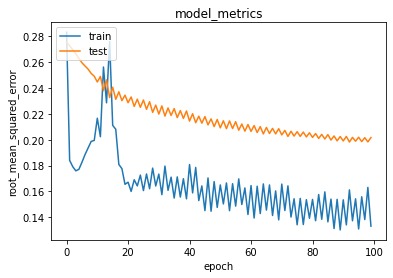

In [40]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Mengambil sampel dan menentukan anime yang telah ditonton dan belum ditonton sampel

In [41]:
anime_df = anime_new
df = rating
 
user_id = df.user_id.sample(1).iloc[0]
anime_watched_by_user = df[df.user_id == user_id]
 
anime_not_watched = anime_df[~anime_df['id'].isin(anime_watched_by_user.anime_id.values)]['id'] 
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_to_anime_encoded.keys()))
)
 
anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

Membuat Top N Recommendation

In [44]:
ratings = model.predict(user_anime_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)
 
top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)
 
anime_df_rows = anime_df[anime_df['id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.anime_name, ':', row.genres)
 
print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)
 
recommended_anime = anime_df[anime_df['id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.anime_name, ':', row.genres)

Showing recommendations for users: 254526
Anime with high ratings from user
--------------------------------
Danganronpa 3: Monokuma Gekijou : Comedy, Parody
--------------------------------
Top 10 anime recommendation
--------------------------------
Fushigi no Kuni no Miyuki-chan : Comedy, Ecchi, Fantasy, Shoujo Ai
Clannad: After Story : Slice of Life, Comedy, Supernatural, Drama, Romance
Initial D Extra Stage 2 : Action, Cars, Sports, Drama, Seinen
Mobile Suit Gundam Unicorn : Action, Drama, Mecha, Military, Sci-Fi, Space
So Ra No Wo To Specials : Military, Music, Sci-Fi, Slice of Life
Steins;Gate : Thriller, Sci-Fi
Gintama° : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
3-gatsu no Lion 2nd Season : Drama, Game, Seinen, Slice of Life
Saenai Heroine no Sodatekata Fine : Harem, Comedy, Romance, Ecchi, School
Kawaki wo Ameku : Music
